## Observations and Insights

## Dependencies and starter code

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset with merge function 


In [7]:
#Mouse Metadata
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [8]:
#Study Results
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [9]:
# Combine the data into a single dataset with merge function on Mouse ID becauase that is common column 
merged_df = pd.merge(mouse_metadata, study_results, on=('Mouse ID'))
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [10]:
# Demonstrate calculating measures of central tendencys

drug_group_stats = merged_df.groupby('Drug Regimen').agg(\
Mean_Tumor_Volume=('Tumor Volume (mm3)', np.mean),\
Median_Tumor_volume=('Tumor Volume (mm3)', np.median),\
Variance_Tumor_Volume=('Tumor Volume (mm3)', np.var),\
StdDev_Tumor_Volume=('Tumor Volume (mm3)', np.std),\
 Sem_Tumor_Volume=('Tumor Volume (mm3)', st.sem)\
).round(2)

# Display the Summary statistics table grouped by 'Drug Regimen' column
ss

NameError: name 'ss' is not defined

In [11]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

#Group Merged by Drug Regiment 
#Create new alias for data frame of merged data grouped by "Drug Regimen" using the count function to find the count of each group
pandas_bar = merged_df.groupby('Drug Regimen')
pandas_bar_count = pd.DataFrame(pandas_bar['Drug Regimen'].count())



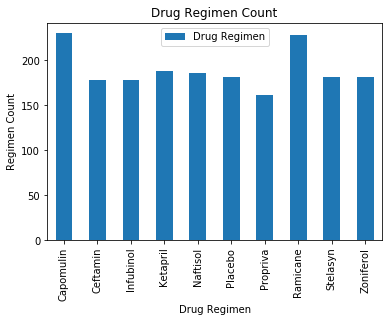

<Figure size 432x288 with 0 Axes>

In [12]:
#use bar count dataframe to create bar chart with limits, chart labels, and legend
chart = pandas_bar_count.plot(kind='bar',title= "Drug Regimen Count")
#y axis label
chart.set_ylabel("Regimen Count")

plt.legend()

plt.show()
plt.tight_layout()

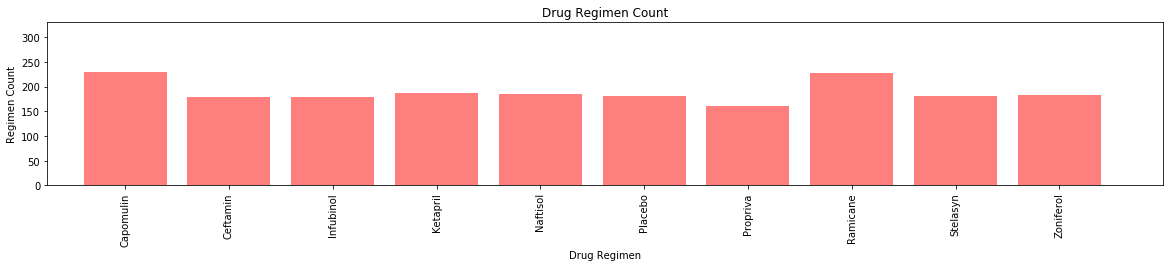

<Figure size 432x288 with 0 Axes>

In [13]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
#x_axis & ticklocations
x_axis = np.arange(len(pandas_bar_count))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,3))
plt.bar(x_axis, pandas_bar_count["Drug Regimen"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, list(pandas_bar_count.index), rotation="vertical")

#Create Labels, titles, min/max
plt.xlim(-.75, len(x_axis))
plt.ylim(0, max(pandas_bar_count["Drug Regimen"])+100)
plt.title("Drug Regimen Count")
plt.xlabel("Drug Regimen")
plt.ylabel("Regimen Count")



plt.show()
plt.tight_layout()

## Pie plots

In [14]:
#Create Data Frame Group by Sex
mf = merged_df.groupby("Sex")
mf_count = pd.DataFrame(mf["Sex"].count())

mf_count.head()

,Sex
Sex,
Female,935
Male,958


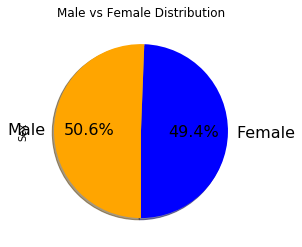

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Create a pie chart based off of the group series from before
mf_count.plot(kind='pie', y='Sex', title="Male vs Female Distribution",startangle=270,autopct='%1.1f%%'
              ,shadow=True, fontsize=16, colors =["blue","orange"],legend =False)

plt.show()

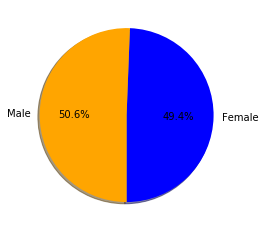

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


gender = list(mf_count.index.values)
gender_count = mf_count['Sex']
colors = ["blue", "orange"]

plt.pie(gender_count, labels=gender, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=270)
plt.show()

## Quartiles, outliers and boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Calculate the IQR and quantitatively determine if there are any potential outliers.


In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

Text(0, 0.5, 'Tumor Volume (mm3)')

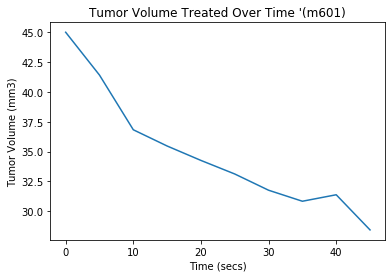

In [19]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#generate dataframe where the value in the Drug Regiment column is only Capomuin
capomulin = merged_df.loc[merged_df["Drug Regimen"]=='Capomulin']
mouse = capomulin.loc[capomulin["Mouse ID"]=='m601']
plt.plot(mouse["Timepoint"], mouse["Tumor Volume (mm3)"])

plt.title("Tumor Volume Treated Over Time '(m601)")
plt.xlabel("Time (secs)")
plt.ylabel("Tumor Volume (mm3)")

Text(0, 0.5, 'Average Volume (mm3)')

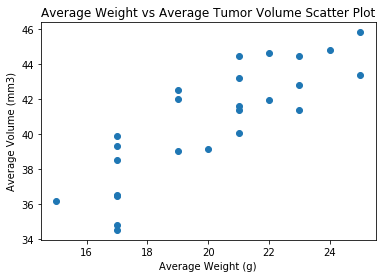

In [20]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
aver = capomulin.groupby(['Mouse ID']).mean()
plt.scatter(aver["Weight (g)"], aver["Tumor Volume (mm3)"])
plt.title("Average Weight vs Average Tumor Volume Scatter Plot")
plt.xlabel("Average Weight (g)")
plt.ylabel("Average Volume (mm3)")

Text(0, 0.5, 'Average Tumor Volume (mm3)')

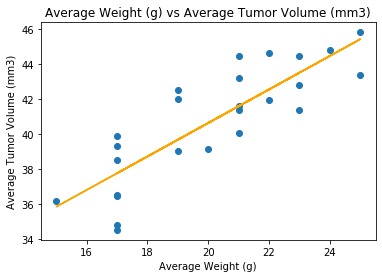

In [68]:

reg_line = st.linregress(aver["Weight (g)"], aver['Tumor Volume (mm3)'])
y_value = aver["Weight (g)"]* reg_line[0]+reg_line[1]
plt.scatter(aver["Weight (g)"], aver['Tumor Volume (mm3)'])
plt.plot(aver["Weight (g)"], y_value, color = 'orange')
plt.title("Average Weight (g) vs Average Tumor Volume (mm3)")
plt.xlabel('Average Weight (g)')
plt.ylabel("Average Tumor Volume (mm3)")